In [11]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [13]:
X = data.T.copy()
y = target.copy()
coef

array([62.6735955, 68.0472182])

In [14]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [20]:
def eval_model(X, y, iterations, alpha=1e-4):
    r_eval = []
    a = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
        r_eval.append([i, err])
    r_eval  = np.asarray(r_eval)        
    return W, r_eval

In [21]:
r_eval = np.array([])
W_eval, r_eval = eval_model(X, y, iterations=1000, alpha=1e-2)
W_eval

100 [53.24736421 58.55523249] 202.15752601274872
200 [60.99693431 66.87701837] 30.137723976688044
300 [62.13302218 68.07728146] 26.504325384374987
400 [62.29943271 68.25052758] 26.4275620004925
500 [62.32378977 68.2755512 ] 26.425939884317245
600 [62.32735247 68.27916788] 26.425905601184706
700 [62.32787328 68.2796909 ] 26.425904876520814
800 [62.32794937 68.27976658] 26.42590486120149
900 [62.32796048 68.27977753] 26.425904860877615
1000 [62.3279621  68.27977912] 26.425904860870762


array([62.3279621 , 68.27977912])

In [22]:
def eval_sgd_model(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    r_sgb = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))

        if i % (iterations / 10) == 0:
            print(i, W, err)
        r_sgb.append([i, err])
    r_sgb  = np.asarray(r_sgb)
    return W, r_sgb

In [23]:
r_sgb = np.array([])
w_sgb, r_sgb = eval_sgd_model(X, y, iterations=1000, qty_in_batch=1, alpha=1e-2)
w_sgb

100 [53.24785532 58.46131062] 3.38151962857932
200 [60.97120925 66.8370285 ] 23.548186376901413
300 [62.12488836 68.06712937] 28.02816077944817
400 [62.29707026 68.24792602] 28.717884560601085
500 [62.32274788 68.27451757] 28.819821149986463
600 [62.32657457 68.27843117] 28.834809826133085
700 [62.32714451 68.27900749] 28.83701348904012
800 [62.32722934 68.2790924 ] 28.837337656941024
900 [62.32724197 68.27910492] 28.837385372491738
1000 [62.32724384 68.27910676] 28.837392399956283


array([62.32724384, 68.27910676])

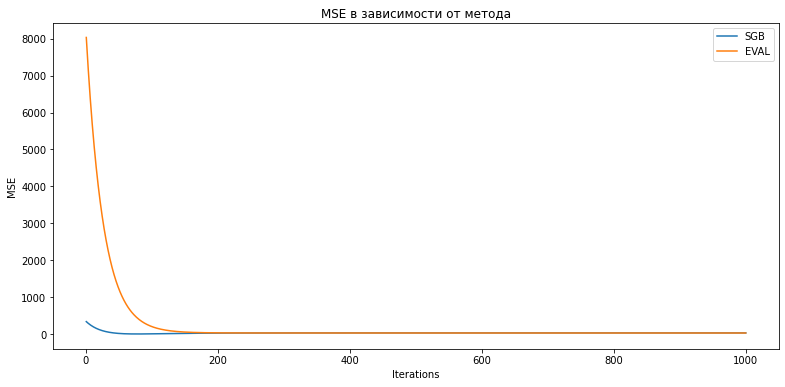

In [24]:
plt.figure(figsize=(13, 6))
plt.title('MSE в зависимости от метода')
plt.xlabel(r'Iterations')
plt.ylabel(r'MSE')

plt.plot(r_sgb[:, 0], r_sgb[:, 1], r_eval[:, 0], r_eval[:, 1])
plt.legend(("SGB", "EVAL"))
plt.show()

In [25]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    r_l2 = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
        r_l2.append([i, err])
    r_l2  = np.asarray(r_l2)
    return W, r_l2

In [26]:
r_l2 = np.array([])
W_l2, r_l2 = eval_model_reg2(X, y, iterations=1000, alpha=1e-2, lambda_=1e-4)
W_l2

100 [53.24725692 58.42308297] 204.73733808633978
200 [60.99331793 66.85593124] 30.20630304070666
300 [62.1295916  68.07132914] 26.508043574077455
400 [62.29611853 68.24664146] 26.427992927135143
500 [62.32050396 68.27194766] 26.42601898540432
600 [62.32407225 68.27560306] 26.42593615920742
700 [62.32459406 68.27613139] 26.425928432741667
800 [62.32467032 68.2762078 ] 26.425927400852117
900 [62.32468146 68.27621886] 26.42592725279169
1000 [62.32468309 68.27622046] 26.425927231310766


array([62.32468309, 68.27622046])

In [27]:
def eval_model_reg3(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    r_l1 = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_/2) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
        r_l1.append([i, err])
    r_l1  = np.asarray(r_l1)
    return W, r_l1

In [28]:
r_l1 = np.array([])
W_l1, r_l1 = eval_model_reg3(X, y, iterations=1000, alpha=1e-2, lambda_=1e-4)
W_l1

100 [53.24910717 58.42510163] 204.66655567526826
200 [60.99622931 66.85910068] 30.18999443781989
300 [62.13277446 68.0747884 ] 26.505432587655942
400 [62.29935816 68.2501604 ] 26.427587682042233
500 [62.32375439 68.2754778 ] 26.42594079248447
600 [62.32732462 68.27913519] 26.425905675152876
700 [62.32784676 68.27966387] 26.425904887152434
800 [62.32792308 68.27974033] 26.425904863839918
900 [62.32793423 68.2797514 ] 26.425904862379394
1000 [62.32793586 68.279753  ] 26.425904862207812


array([62.32793586, 68.279753  ])

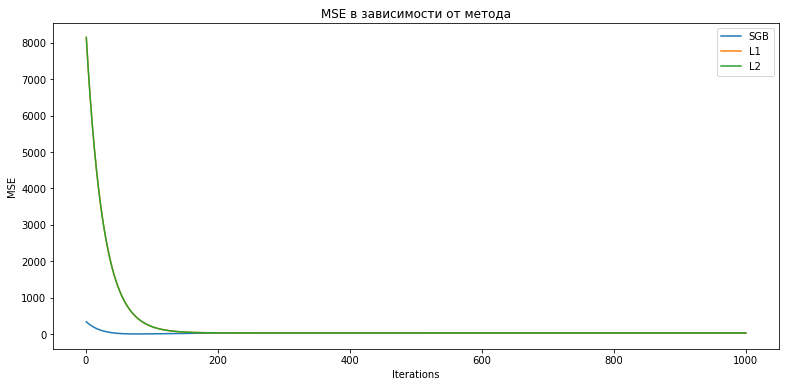

In [29]:
plt.figure(figsize=(13, 6))
plt.title('MSE в зависимости от метода')
plt.xlabel(r'Iterations')
plt.ylabel(r'MSE')

plt.plot(r_sgb[:, 0], r_sgb[:, 1], r_l1[:, 0], r_l1[:, 1], r_l2[:, 0], r_l2[:, 1])
plt.legend(("SGB", "L1", "L2"))
plt.show()